# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# Importing basic libraries needed 

# Libraries needed to read the data
import numpy as np
import pandas as pd

# Libraries needed for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Machine Learning Models from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Importing additional necessary functions from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

#Importing functions for metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report, precision_recall_curve, make_scorer, recall_score

#Code to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
# Loading the dataset
data = pd.read_csv('ExtraaLearn.csv')

In [3]:
# making a working copy of the dataset
df = data.copy()

### Looking at the first and last 5 rows of the dataset

In [4]:
# viewing first 5 rows of data
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
# viewing last 5 rows of data
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


### Understanding the shape and information of the dataset

In [6]:
# checking the shape of the dataset
df.shape

(4612, 15)

In [7]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

#### Observations:
* The dataset contains **4612 rows and 15 columns**.
* The data in 5 columns is numerical while the other 10 are object data types.
* All the columns have 4612 non-null values which indicates that there are **no missing values** in the dataset.

### Checking the data for duplicates and unique values

In [8]:
# checking for duplicates
df.duplicated().sum()

0

In [9]:
# checking for number of unique values per column
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

#### Observations:
* There are **no duplicated rows**.
* There are 4612 unique ID values. This column is simply **an identifier which is unique to each lead**. We can drop this column as it would not add value to the analysis.
* current_occupation and profie_completed have 3 unique values while the other object type variables have 2 unique values. We will explore these further in the EDA section. 
* age, website_visits, time_spend_on_website, status and page_views_per_visit contain numerical data. 

Let's drop the ID column and define lists for the numerical and categorical columns to explore them separately.

In [10]:
# dropping ID column
df.drop(columns='ID', axis = 1, inplace = True)

In [11]:
# making a list of all categorical variables
cat_cols = ['current_occupation','first_interaction','profile_completed','last_activity',
           'print_media_type1','print_media_type2','digital_media','educational_channels','referral']

#making a list of all numerical variables
num_cols = df.select_dtypes(include = np.number).columns.tolist()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Univariate Analysis

### Univariate analysis of numerical data

In [12]:
# summary statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


#### Observations:
* **Average age of the leads is 46.2** with a minimum age of 18 and a maximum of 63. Over 75% of the leads are more than 36 years old.
* The **average number of website visits is ~3.6 with a maximum of 30** which is much larger than the 75th percentile of 5. This might indicate some outliers that can be explored further.
* Similarly, the **average page views per visit are ~3 with a maximum of 18.434** which indicates some outlying values. 
* **Time spent on the website averages to about 724.** There are some leads that spend much longer exploring the website and this can be explored further.
* Status  has only two values 0 and 1 indicating not converted and converted leads. **The average status is 0.298 indicating that only 30% of the leads have converted into paid custormers.**

#### Visualizing the distributions of numerical data


AGE


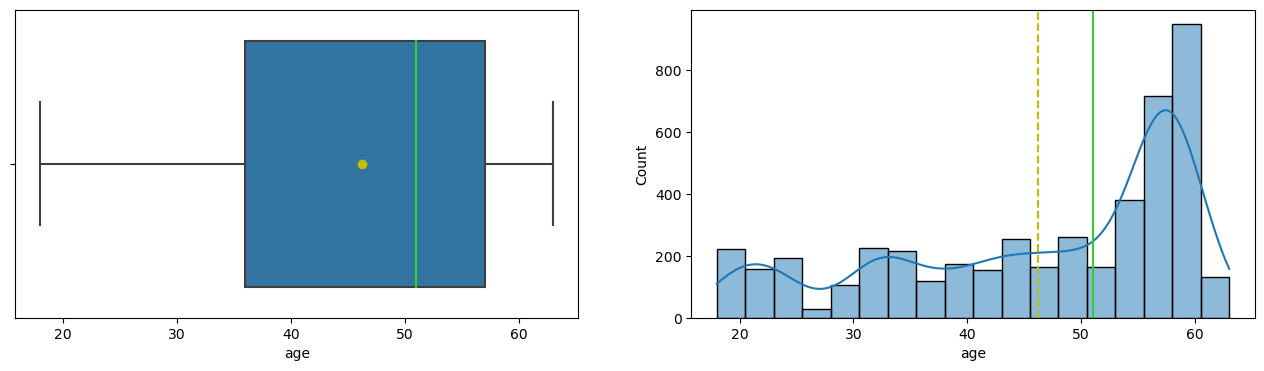

WEBSITE_VISITS


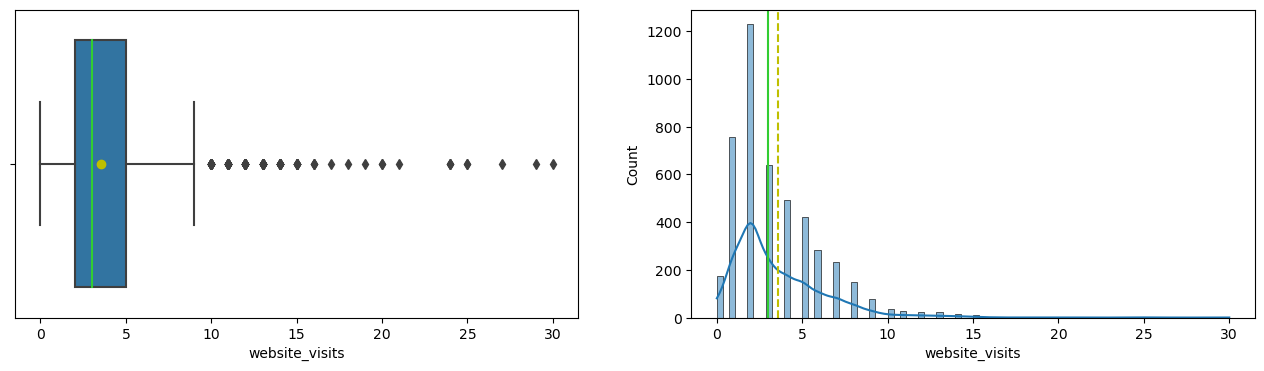

TIME_SPENT_ON_WEBSITE


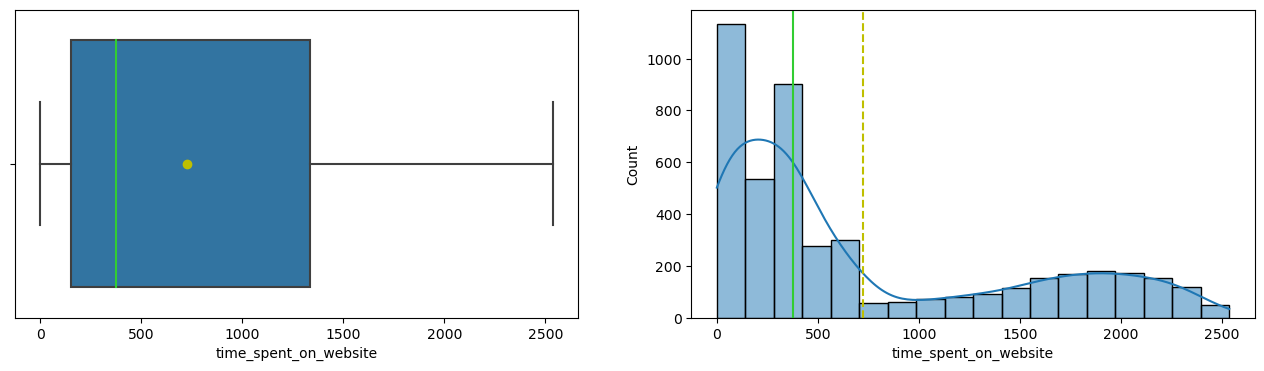

PAGE_VIEWS_PER_VISIT


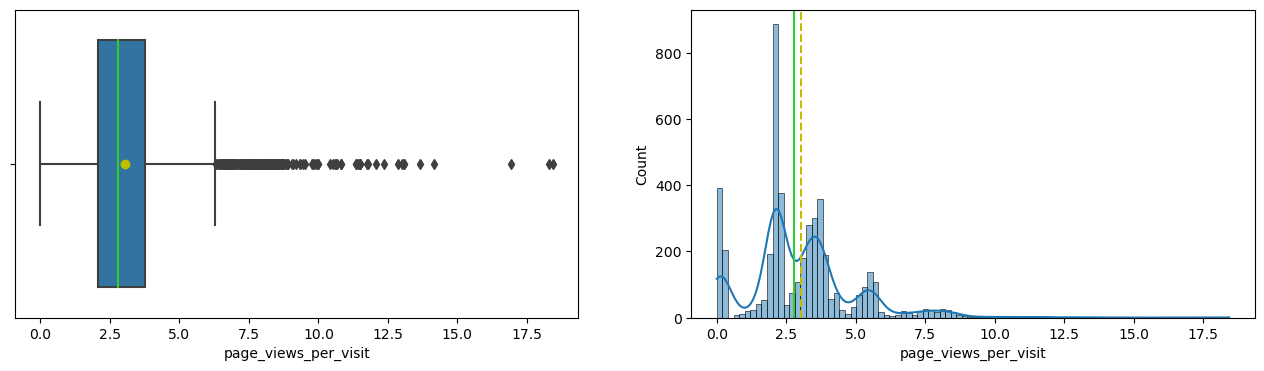

In [13]:
for col in num_cols:
    if col != 'status':
        plt.figure(figsize = (16,4))
        print(col.upper())
        # create subplots with boxplot on the left and histogram on the right

        # first sublot is boxplot with mean displayed as a circle
        plt.subplot (1, 2, 1)
        sns.boxplot(data = df, x = col, showmeans = True, medianprops = {"color":"limegreen"}, 
                meanprops = {"marker":"o","markerfacecolor":"y","markeredgecolor":"y", "markersize":"6"})

        # second subplot is the histogram with median added as solid line and mean added as dashed line
        plt.subplot (1, 2, 2)
        plot = sns.histplot(data = data, x = col, kde = True)
        plot.axvline(np.mean(data[col]), color = 'y', linestyle = '--')     
        plot.axvline(np.median(data[col]), color = 'limegreen', linestyle = '-') 
    
        plt.show()

#### Observations: 
* The distribution of age is skewed to the left, with about **25% of the leads being younger than 36 years old**. However the majority of leads are older with a median age of 51.
* The majority of leads visit the website less than 3 times with many that have never visited the website. The distribution is however skewed to the right and we have several outliers. These outliers can be leads who may take longer to make up their mind on programs or may have to revisit the website several times to understand the programs offered.
* The time spent on the website has an almost **bimodal distribution** with two centers, one around 300s and the other around 1800s. This could indicate two groups of people exploring the website. The second group are perhaps more interested in the programs being offered and prefer getting more information from the website.
* The page views per visit have several outliers skewing the distribution to the right.

### Univariate analysis for categorical variables

* First, we'll define a function to plot the categorical variables with their counts and label them with their respective percentages.
* Next,  we'll run this function through a for loop to plot the countplots of all categorical variables in a single subplot.

In [14]:
#defining a function for countplot with percentage label
def labeled_countplot(data, column):
    # creating the countplot
    plot = sns.countplot(data = data, x = column, order = data[column].value_counts().index)
    
    # creating the percentage labels
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(data)) # calculating the percentage value
        x = p.get_x() + p.get_width() / 2 - 0.2                       # calculating the x coordinate for the label
        y = p.get_y() + p.get_height()                                # calculating the y coordinate for the label
        plot.annotate(percentage, (x,y), size = 14)                   # annotating the graph with the label at (x,y) 
                              
    plot.set_title(column, fontsize = 16)     # formatting the title
    plot.set_xlabel('')                       # formatting the x label to display nothing
    plt.xticks(rotation = 90, fontsize = 14)  # formatting the x ticks to rotate 90 and adjusting font

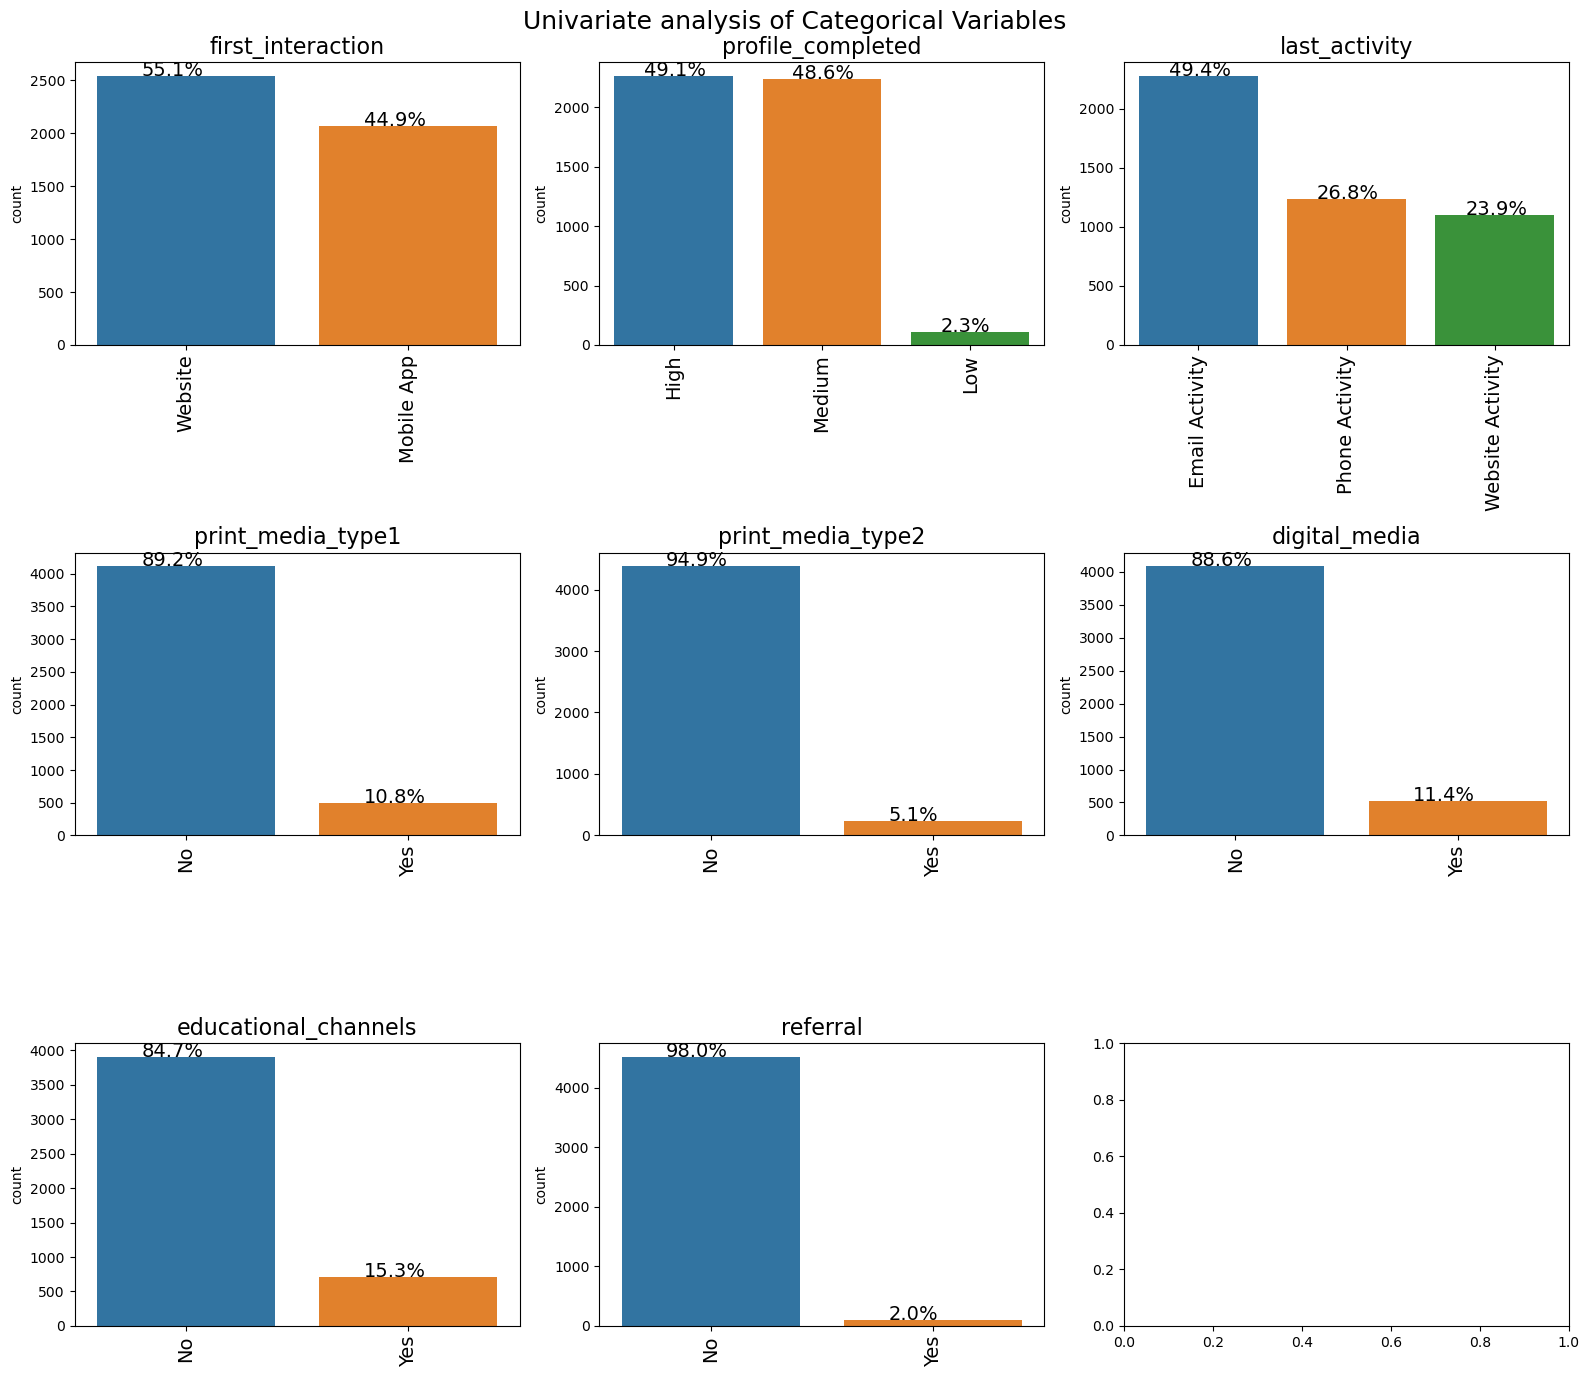

In [15]:
# plotting the countplots of categorical variables 
fig = plt.figure(figsize = (16,14))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.suptitle('Univariate analysis of Categorical Variables', fontsize = 18)

# defining a variable for the index of the subplot
plot_number = 1

for col in cat_cols:                # iterating through the list of categorical variables 
    labeled_countplot(df, col)      # to plot the labeled countplot 
    plt.subplot(3,3,plot_number)    # into a 3x3 subplot
    plot_number = plot_number + 1

plt.tight_layout()
plt.show()   
    
  

#### Observations:
* **Professionals** comprise greater than 56.7% of the leads. This is followed by individuals who are unemployed. These leads may be looking for programs that improve their skills at their current profession or exploring skills that they can develop to apply for new jobs. This makes sense as ExtraaLearn is a platform that provides customers with programs in cutting-edge technologies to upskill/reskill.
* As expected, **more than half of the leads (~55%) use the website** to interact with ExtraaLearn. 
* Only 2.3% of the leads have low (less than 50%) completion of their profiles. The remaining **97.7% have completed atleast 50% of their profiles** on the website/mobile app with values being almost equal for medium and high completion.
* Close to half (~49.4%) of the leads used emails for their last interaction with ExtraaLearn, 26.8% over the phone and 23.9% directly on the website. This indicates that the **leads prefer online forms of communication**.
* **Advertizing in print and digital media seems to have a lower reach than learning about ExtraaLearn through educational channels**. While Newspapers (print_media_type_1) perform slightly better (10.8%) compared to magazines (print_media_type_2) (5.1%), overall not many leads have actually interacted with ads on print or digital media.
* Finally, **only 2%** of all leads have heard about ExtraaLearn through **reference**.

### Target variable - Status

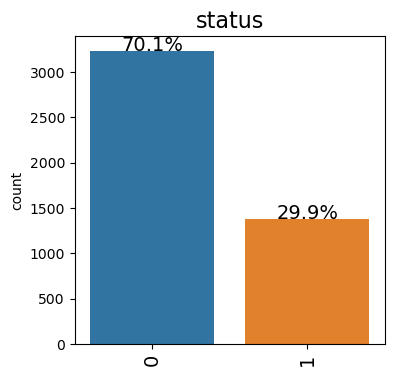

In [16]:
fig = plt.figure(figsize = (4,4))
labeled_countplot(df, 'status')
plt.show()

#### Observations:
* The plot shows that **only ~30% of the leads generated are converted into paid customers**.
* This is expected as not all leads are expected to convert.
* Status is our target variable and in the upcoming sections we will look at the relationships between status and other variables.

## Bivariate Analysis

Let's define a function for plotting stacked barplots.

In [17]:
# defining a function that cross-tabulates frequencies of given independent and dependent variable and 
# plots a stacked barplot using those frequencies.

def stacked_barplot(independent, dependent):
    
    #crosstabulating and printing the transpose
    print(pd.crosstab(df[independent], df[dependent], normalize = 'index').T)
    
    #creating a stacked barplot
    (pd.crosstab(df[independent], df[dependent], normalize='index')*100).plot(kind='bar',stacked=True)    
    
    plt.ylabel(f'Percentage %')
    
    plt.show()

### Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program.

current_occupation  Professional   Student  Unemployed
status                                                
0                       0.644878  0.882883    0.734212
1                       0.355122  0.117117    0.265788


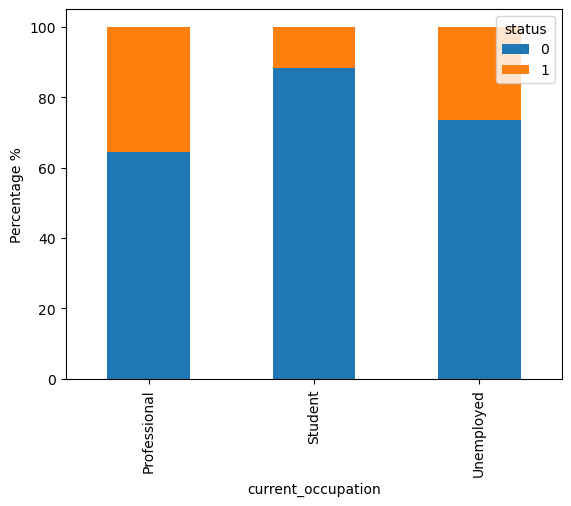

In [18]:
# calling the user defined function stacked_barplot
stacked_barplot('current_occupation', 'status')

#### Observations:
* ExtraaLearn is a platform that provides customers with programs on cutting-edge technologies to upskill/reskill.
* As expected, **~35.5% of professional leads converted into paying customers**. Working professionals are more likely to look for ways to upskill and increase their work performance, transition to new roles or take up more responsibility.
* **Approx. 26.5% unemployed leads have also signed up** for ExtraaLearn programs. Unemployed individuals are more likely to look for skills that they can develop to apply for new jobs. 
* Very few (~11.7%) students have signed up for a program with ExtraaLearn. These students are likely deeply focused and inquisitive about the scope of cutting-edge technologies and may be preparing for specializations in these fields.

#### Let's look at the age of the individuals in different occupations

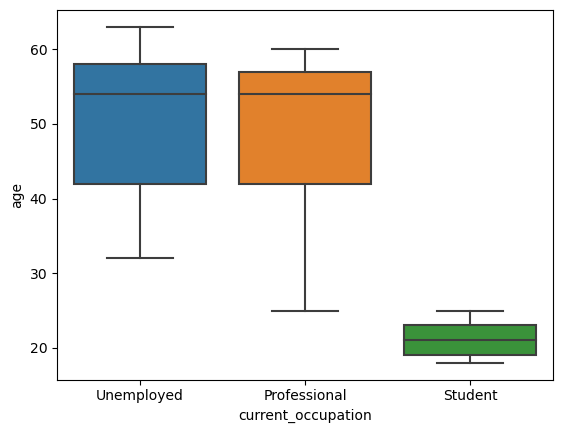

In [19]:
# creating a box plot of age based on current occupation
sns.boxplot(data = df, x = 'current_occupation', y = 'age')
plt.show()

In [20]:
# summarizing occupation of leads grouped by age
df.groupby(['current_occupation'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


#### Observations:
* The range of age for students is 18 to 25 years so they most likely have a minimum of a high school education.
* The range of age for professionals is 25 to 60 years.
* The range of age for unemployed is 32 to 63 years. 
* The average age of professionals and unemployed leads is **approx. 50 years** so it is possible that many leads are actually looking to upskill/reskill in later stages of their career or due to losing/quitting a job.

### The age of the leads may play a role in success of conversion. Let us further analyze this.

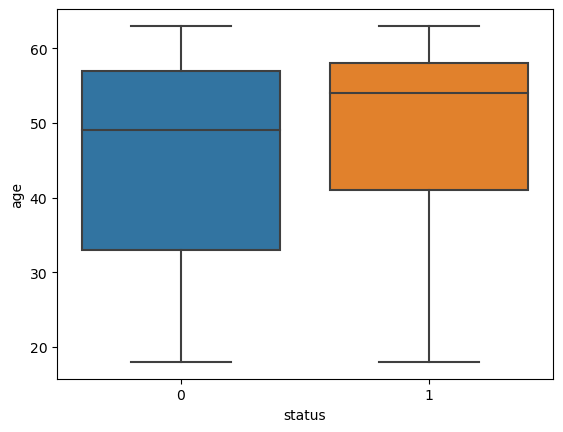

In [21]:
# creating a box plot of age based on status
sns.boxplot(data = df, x = 'status', y = 'age')
plt.show()

In [22]:
df.groupby(['status'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3235.0,45.153014,13.748843,18.0,33.0,49.0,57.0,63.0
1,1377.0,48.663762,11.293692,18.0,41.0,54.0,58.0,63.0


#### Observations:
* The range of ages of converted leads is 18 to 63 years.
* The average age of leads that converted to paid customers is **~48.6 years**.
* Interestingly, more that **75% percent of the converted leads are older than 41 years**.
* Thus, as previously mentioned, it is possible that many leads are actually looking to upskill/reskill in later stages of their career to develop further or due to losing/quitting a job.

### The company's first impression on the customer must have an impact. Let's check if the first channels of interaction have an impact on the lead status.

first_interaction  Mobile App  Website
status                                
0                    0.894686  0.54406
1                    0.105314  0.45594


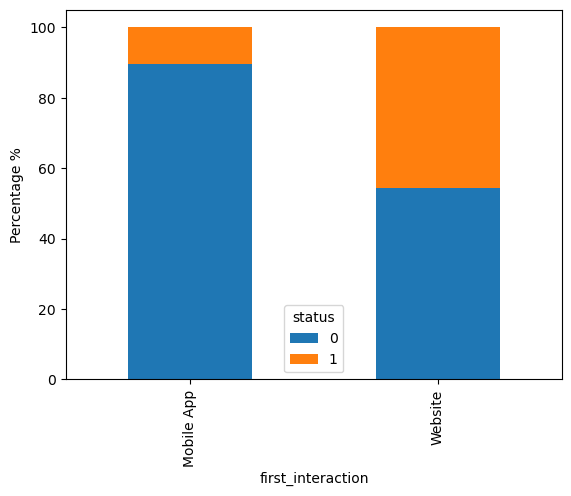

In [23]:
# calling the user defined function stacked_barplot
stacked_barplot('first_interaction', 'status')

#### Observations:
* **First interactions with the website** seem to do a better job at retaining and converting leads with **~45.5% conversions** as compared to **only ~10.5% with the mobile app**.
* It is likely that websites can provide more information about the program. 
* This could also point to deficiencies in the mobile app such as usability etc. which could be explored in the future.

The company uses multiple modes to interact with prospects. Which way of interaction works best?

People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### One of the common ways that the leads interact with is through websites. Let's try and understand how well this interaction works.

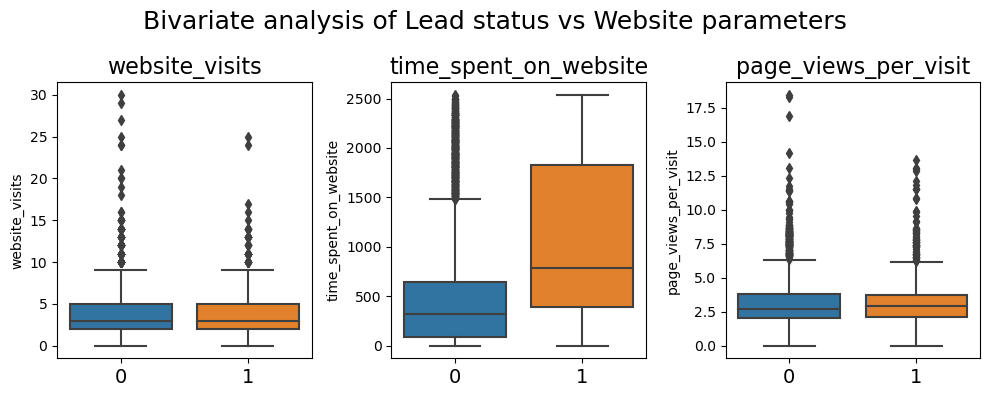

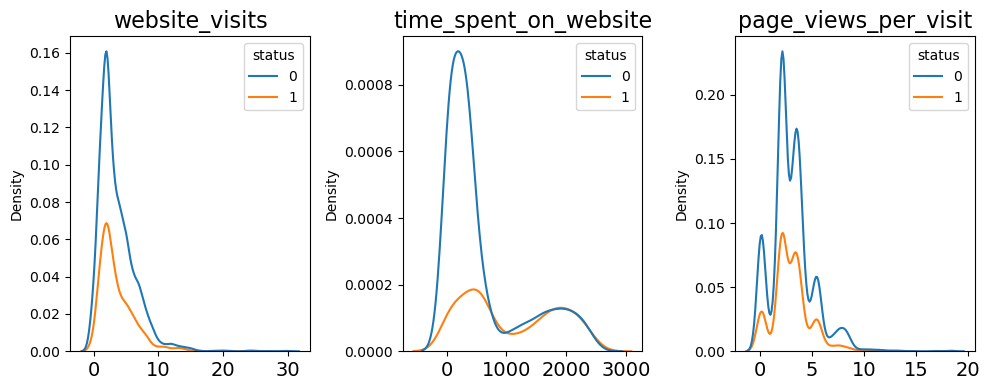

In [24]:
# create a list containing the desired independent variables related to website interaction
web_list = ['website_visits', 'time_spent_on_website', 'page_views_per_visit']

# plotting the relationship of our target variable with variables in the web_list
plt.figure(figsize = (10,4))
plt.suptitle('Bivariate analysis of Lead status vs Website parameters', fontsize = 18)

# creating boxplots for each independent variable by using subplot and iterating through the list 

for i,col in enumerate(web_list):
    
    # creating the subplot 
    ax = plt.subplot(1, 3, i+1)
    plot = sns.boxplot(data = df, x = 'status', y = col, ax = ax)
    plot.set_xlabel('')
    plt.xticks(fontsize = 14)
    plot.set_title(col, fontsize = 16)
    plt.tight_layout()

plt.show()

# creating kernel density plots for each independent variable by using subplot and iterating through the list 

plt.figure(figsize = (10,4))

for i,col in enumerate(web_list):
    ax = plt.subplot(1, 3, i+1)
    plot = sns.kdeplot(data = df, x = col, hue = 'status', ax = ax)
    plot.set_xlabel('')
    plt.xticks(fontsize = 14)
    plot.set_title(col, fontsize = 16)
    plt.tight_layout()

plt.show()

In [25]:
df.groupby(['status'])[web_list].mean()

,website_visits,time_spent_on_website,page_views_per_visit
status,,,
0,3.578980,577.420711,3.025732
1,3.538126,1068.397967,3.027050


#### Observations:
* The boxplots and kdeplots above show that the distribution between leads that are not converted vs those that are converted is similar for website visits. The average website visits is around 3.5 for both. This indicates that the number of times a lead visits the website may not affect their interest in paying for the program.
* This is also the case for page views per visit. Here the average page views per visit is ~3 for both converted and not converted leads.
* Finally, the time spent on the website has a clear difference in the distribution between not converted and converted leads. From the kernel density plot we can see that there is a steep peak associated with leads that did not convert and also spent less than 500s on the website. On the other hand, **leads that converted average ~1068s on the website**. This indicates that **time spent on the website could have a positive impact on conversion rate**.
* This could be because these leads may be **more interested in what the program has to offer** and thus spend more time on the website. It could also indicate that the website may have a **more positive impact on the leads perception** of the program as we saw previously that first interactions with websites led to greater lead conversions.

#### Let's also peak into leads that did not visit the website to further analyze the data.

In [26]:
# finding the number of leads that didn't visit the website
df[df['website_visits'] == 0]['status'].value_counts()

0    142
1     32
Name: status, dtype: int64

In [27]:
# understanding website non-visitors further
df[(df['website_visits'] == 0) & (df['status'] == 1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32.0,NaN,NaN,NaN,49.21875,11.84506,19.0,42.75,56.0,58.0,60.0
current_occupation,32,3,Professional,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,32,1,Website,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,32,1,High,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,32.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
time_spent_on_website,32.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
page_views_per_visit,32.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
last_activity,32,2,Email Activity,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,32,2,No,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type2,32,2,No,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations:
* There were 174 leads that did not visit the websites.
* Interesting 18% of these leads did convert into paying customers. 
* Further analysis shows that these individuals **first interacted with the website** indicating once more that the website is definitely a valuable resource for ExtraaLearn's programs.

### The company gets leads from various channels such as print media, digital media, referrals, etc. Let's check which of these channels have the highest lead conversion rate.

print_media_type1       No      Yes
status                             
0                  0.70401  0.68008
1                  0.29599  0.31992


<Figure size 1000x800 with 0 Axes>

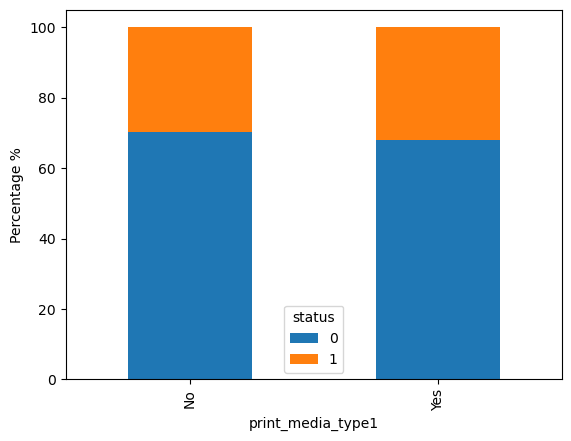

print_media_type2        No       Yes
status                               
0                  0.702672  0.678112
1                  0.297328  0.321888


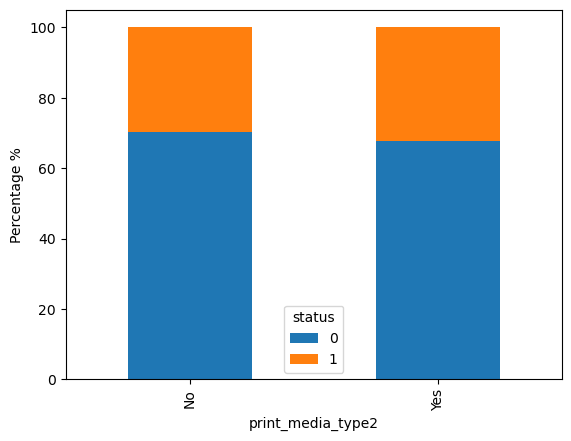

digital_media        No       Yes
status                           
0              0.704039  0.681214
1              0.295961  0.318786


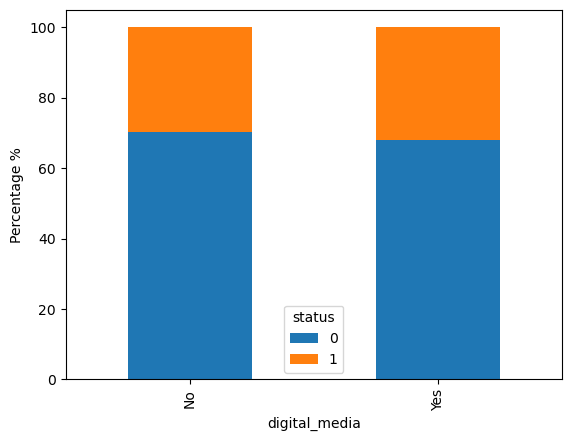

educational_channels        No       Yes
status                                  
0                     0.697978  0.720567
1                     0.302022  0.279433


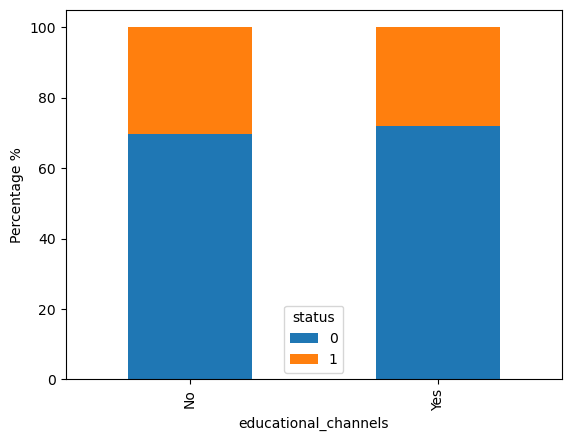

referral        No       Yes
status                      
0         0.709228  0.322581
1         0.290772  0.677419


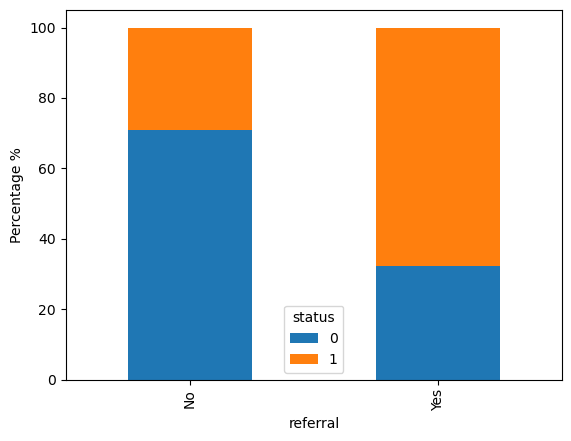

In [28]:
media_channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

fig = plt.figure(figsize = (10,8))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.suptitle('Lead conversion rate of different media channels', fontsize = 18)


for col in media_channels:
    stacked_barplot(col, 'status')
    plt.show()

#### Observations:
* We had previously observed that the number of leads that have seen ads about ExtraaLearn on print or digital media or heard about it from educational channels was quite low.
* Here we observe that there doesn't seem to be difference between the number of leads converted due to exposure to the ads or information from educational channels.
* Overall, this indicates that the **advertising and educational channels are not likely to impact lead conversion**.
* On the other hand, previously we observed that number of referrals are low at less than 2%.
* Here we observe that **the conversion rate of referred leads is very high at greater than 67.7%**.
* Thus, **referrals play a major roal in lead conversion** as they can convince the leads about the authenticity and benefits of the program. it may be a good idea to explore this avenue by exploring the referees i.e. current customers or alumni etc., and providing incentives to them for referring new clients.

### People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information. We will check if having more details about a prospect increase the chances of conversion.


profile_completed      High       Low    Medium
status                                         
0                  0.582155  0.925234  0.811245
1                  0.417845  0.074766  0.188755


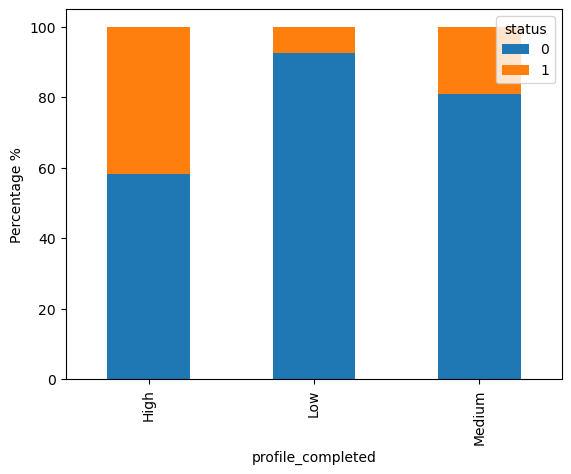

In [29]:
stacked_barplot('profile_completed', 'status')

In [30]:
df.groupby(['status'])['profile_completed'].value_counts()

status  profile_completed
0       Medium               1818
        High                 1318
        Low                    99
1       High                  946
        Medium                423
        Low                     8
Name: profile_completed, dtype: int64

#### Observations:
* Upto **41.7%** of leads that have **high i.e. 75 - 100% completion** of their profiles have converted into paid customers. 
* The higher the completion of the profile, the more likely it is to see a lead conversion.
* This can be expected, as people who have invested time in completing their profiles are more likely to be interested in the programs offered.

### Let's see if last activity has any impact on lead conversion

last_activity  Email Activity  Phone Activity  Website Activity
status                                                         
0                    0.696664        0.786872          0.615455
1                    0.303336        0.213128          0.384545


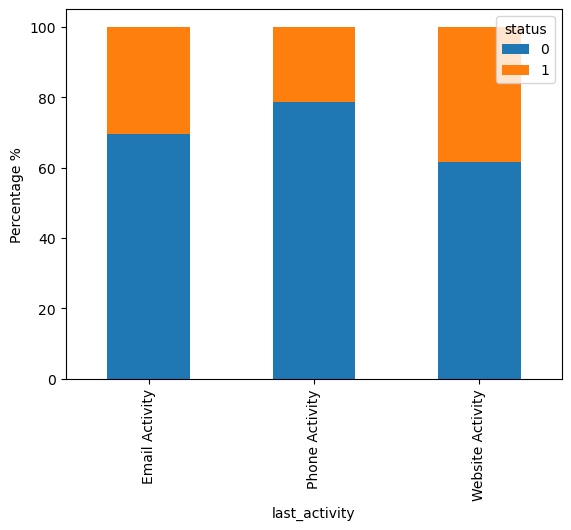

In [31]:
stacked_barplot('last_activity', 'status')

#### Observations:
* Once again we see that website activity is the leading factor in lead conversion followed closesly by email activity.
* This can be expected as people prefer online interactions a lot more in the current era over conversations on the phone. 

### Correlation between numerical variables

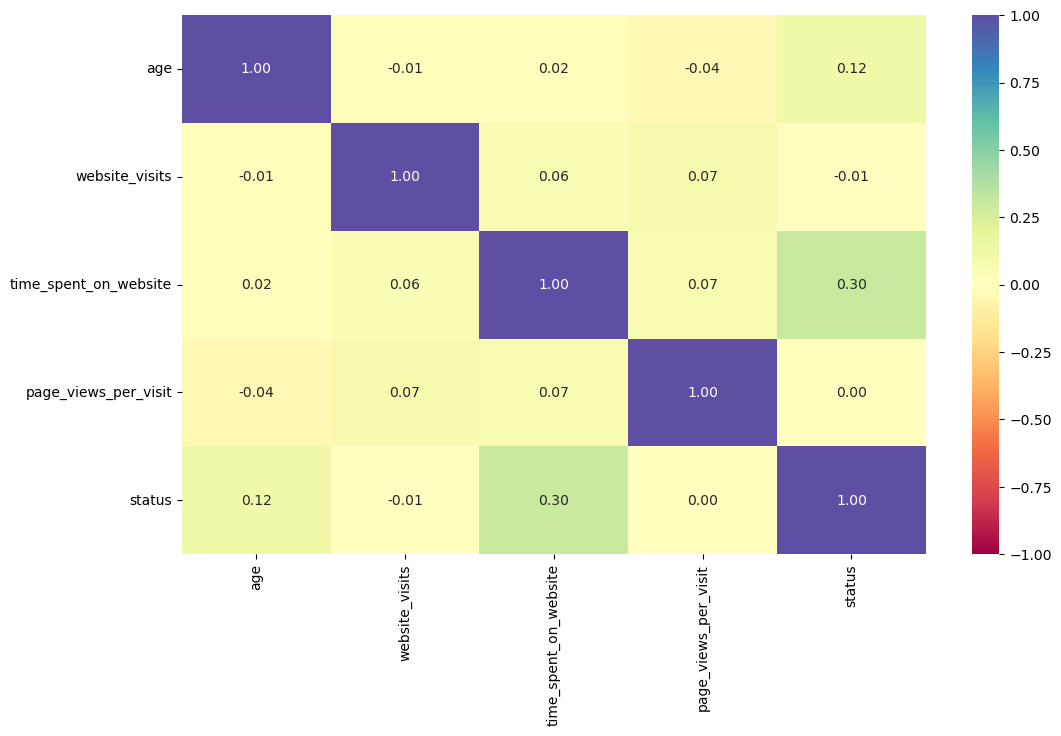

In [32]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:
* As expected, time_spent_on_website has the highest postive correlation with our target variable, status though it is only 0.3.
* Age and status also have some positive correlation. We have previously observed that our converted leads are older.
* Website_visits and status have an extremely weak negative correlation. We have previously observed that website visits do not impact lead conversion. 
* The independent variables have weak or no correlations.

## Data Preprocessing

Before building a classification model, it is important to prepare the data by checking for missing values and outliers. Additionally we need to encode our categorical variables and finally split our dataset into training and test datasets that will be used to evaluate the model.

### Missing values

We previously observed that there were no non-null values in the dataset. Let us confirm this using  the isna() function

In [33]:
# no missing values
df.isna().sum()

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

As seen above, no values are missing from any column in our dataset and we can proceed with further preprocessing.

### Outlier Detection

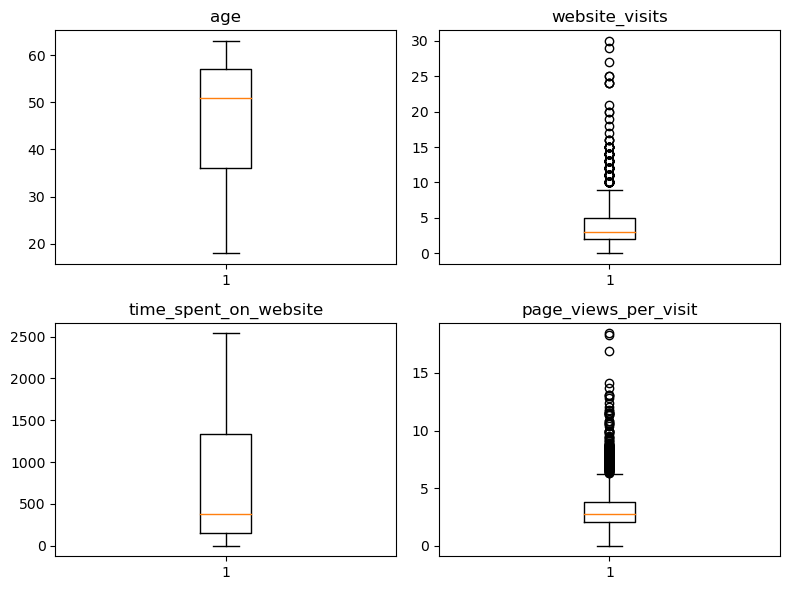

In [34]:
# removing status from the list of numerical variables
num_cols.remove('status')

# checking for outliers by creating a subplot containg box plots
plt.figure(figsize = (8,6))

# iterating through the numerical variables and plotting box plots with the whiskers = 1.5 IQR
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(df[col], whis = 1.5)
    plt.tight_layout()
    plt.title(col)

plt.show()

#### Observations:
* Age and time_spent_on_website do not have any outliers.
* page_views_per_visit and website_visits both have several outliers within range of each other.
* We will not treat these outliers as they are real observations collected from the leads.

### Creating dummy variables for categorical variables

In [35]:
# creating dummy variables
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)
df

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,1,0,1,1,0,0,0,1,1,0,1,0,0
1,56,2,83,0.320,0,0,0,0,0,1,0,1,0,0,0,1,0
2,52,3,330,0.074,0,0,0,1,0,1,0,1,0,0,1,0,0
3,53,4,464,2.057,1,0,1,1,0,0,0,1,0,0,0,0,0
4,23,4,600,16.914,0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2.170,0,0,1,0,0,1,1,0,0,0,0,1,0
4608,55,8,2327,5.393,0,0,0,0,0,1,0,0,0,0,0,0,0
4609,58,2,212,2.692,1,0,0,1,0,0,0,0,0,0,0,0,0
4610,57,1,154,3.879,0,0,0,0,0,1,0,1,1,0,0,0,0


### Separating the target (dependent Y) variable and independent (X) variables.

In [36]:
# separating target variable and other variables
X = df.drop(columns = 'status')
y = df[['status']]

### Let's split the dataset into training and test datasets by setting the test dataset size to 30% of the dataset.

In [37]:
# splitting the data into 70% train and 30% test sets
# using stratify parameter to preserve relative class frequencies
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1, stratify = y)

### Checking the shape of the training and test datasets

In [38]:
print ('X Train shape:', X_train.shape)
print ('X Test shape:', X_test.shape)
print ('y Train shape:', y_train.shape)
print ('y Test shape:', y_test.shape)

X Train shape: (3228, 16)
X Test shape: (1384, 16)
y Train shape: (3228, 1)
y Test shape: (1384, 1)


In [39]:
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize =True)) 
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize = True))

Percentage of classes in training set:
status
0         0.701363
1         0.298637
dtype: float64
Percentage of classes in test set:
status
0         0.70159
1         0.29841
dtype: float64


#### Observations:
* The training dataset (X_train, y_train) has 3228 rows and the test dataset (X_test, y_test) has 1384 rows.
* We observe that the proportion of classes in both the training and test set is the same and matches the previous observations about the target variable - status. This indicates that the **stratify parameter** helped in making a split that was representative of the dataset.
* Additionally, there is **a class imbalance with respect to the target variable** which we will need to take into consideration while building classification models.
* Class 0 comprises 70% of the original dataset while class 1 comprises the remaining 30%.

## Building Classification Models

### Model evaluation criterion

### The model can make two incorrect predictions:
1. Predicting a lead will not be converted to a paid customer when it would've actually converted.
2. Predicting a lead will be converted to a paid customer when it would not actually convert.

### Which prediction is more important?

**Clearly, failing to convert a lead**, i.e. losing a lead that could've converted to a paid customer is **a bigger loss**. 
* The company would lose a potential paying customer if we make a false-negative prediction i.e., predict that a lead will not get converted when the lead would have converted.
* On the other hand, if we make a false-positive prediction i.e., predict that a lead will get converted but it doesn't, the company might lose some resources.

### How to reduce the loss i.e. improve prediction?
The company should focus on **maximizing Recall**. The higher the recall, the higher the chances of minimizing false-negatives and increasing the true-positives.

#### We will create a function to calculate different metrics and confusion matrix that can be used to check the performance of each model.
* The classification_report function is used to check the model performance of models.
* The confusion_matrix function is used to plot the confusion matrix.

In [40]:
# function to calculate and print classification report and confusion matrix 
# metric function
def metric_score(actual, predicted):
    
    # printing the classification report that provides recall, precision and accuracy values 
    print(classification_report(actual, predicted))
    
    # using heatmap to visualize the confusion matrix of actual vs predicted y values
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot = True, 
                fmt = '.2f', 
                xticklabels = ['Not converted','Converted'],
                yticklabels = ['Not converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Now let's build our models.

## Decision Tree

### Building a Decision Tree model

We will build a decision tree model by using the decision tree classifier with a **class_weight hyperparameter** set at {0: 0.3, 1: 0.7} to make up for the class imbalance we have previously observed in the original dataset. This hyperparameter tells the model that **1 is more important**.

In [41]:
# building the decision tree model
dt = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.3, 1: 0.7})

In [42]:
# fitting the tree to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

#### Checking the model performance on training dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



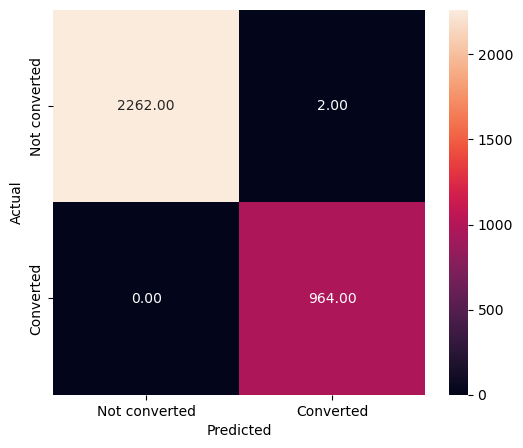

In [43]:
# check performance on training dataset
y_dt_pred_train = dt.predict(X_train)
metric_score(y_train, y_dt_pred_train)

#### Observations: 
* This decision tree is giving a **100% score for all metrics on the training dataset**. 
* Interestingly, based on the confusion matrix, 2 leads have been misclassified as converted when they are not. This could be the effect of adding class weights as a hyperparameter giving more importance to class 1.

#### Checking the model performance on test dataset

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       971
           1       0.66      0.62      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.74      0.75      1384
weighted avg       0.79      0.79      0.79      1384



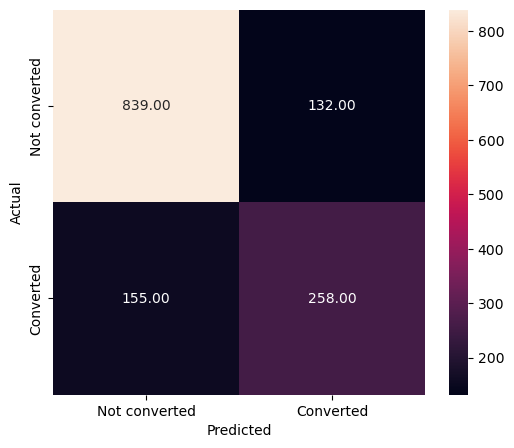

In [44]:
# check performance on test dataset
y_dt_pred_test = dt.predict(X_test)
metric_score(y_test, y_dt_pred_test)

#### Observations:
* The Decision Tree **did not work well on the test data** as the recall is 0.62 in comparison to 1 for the training dataset, i.e., the **Decision Tree is overfitting the training data**.
* The precision on the test data suggests that there's a 34% (1 - 0.66) chance that the model will predict that a person is going to convert even though they would not, and **the company may waste their resources on these leads.**

### Decision Tree - Hyperparameter Tuning

#### Let's choose a set of parameters and tune the Decision Tree and check if we can get a better model.

In [45]:
# Choosing the classifier
dt_tuned = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

# Making a grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Setting up a scorer to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Running the grid search
gridCV = GridSearchCV(dt_tuned, parameters, scoring = scorer, cv = 5)

# Fitting the grid search on the training data
gridCV = gridCV.fit(X_train, y_train)

# Setting the classifier to the best combination of parameters
dt_tuned = gridCV.best_estimator_

# Fitting the best estimator to the training data
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=1)

#### Checking the tuned model performance on training dataset

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



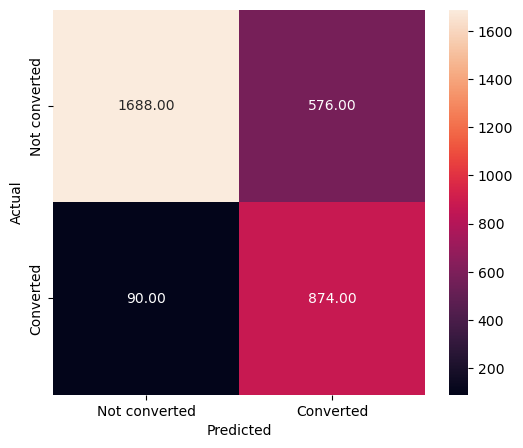

In [46]:
y_dt_tuned_train = dt_tuned.predict(X_train)
metric_score(y_train, y_dt_tuned_train)

#### Observations:
In comparison to the previous Decision Tree, **the performance on the training set has fallen**. While the recall is still quite good at 91%, the precision is down to 60%. This makes sense because we are trying to reduce overfitting.

#### Checking the tuned model performance on test dataset

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



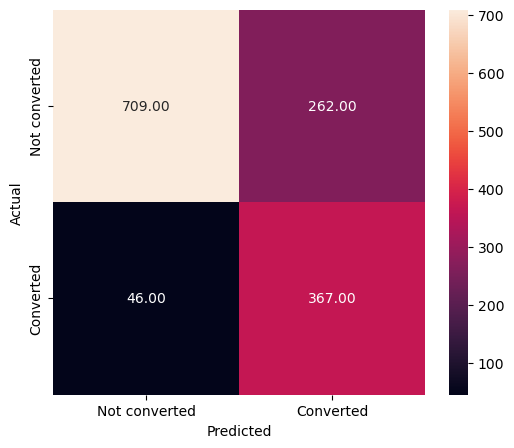

In [47]:
y_dt_tuned_test = dt_tuned.predict(X_test)
metric_score(y_test, y_dt_tuned_test)

#### Observations:
* The tuned model is performing better than the previous Decision Tree with respect to the test dataset. 
* The tuned model is not overfitting the data and gives approximately the same performance on test and training datasets.
* While precision has slightly decreased from 0.62 to 0.58, **recall has improved from 0.62 to 0.89**.
* This means that **this tuned model will give fewer false negatives** i.e. the model will be more successful in predicting which leads will actually convert into paid customers.

### Visualizing the Decision Tree

Let's visualize the tuned decision tree and make observations.

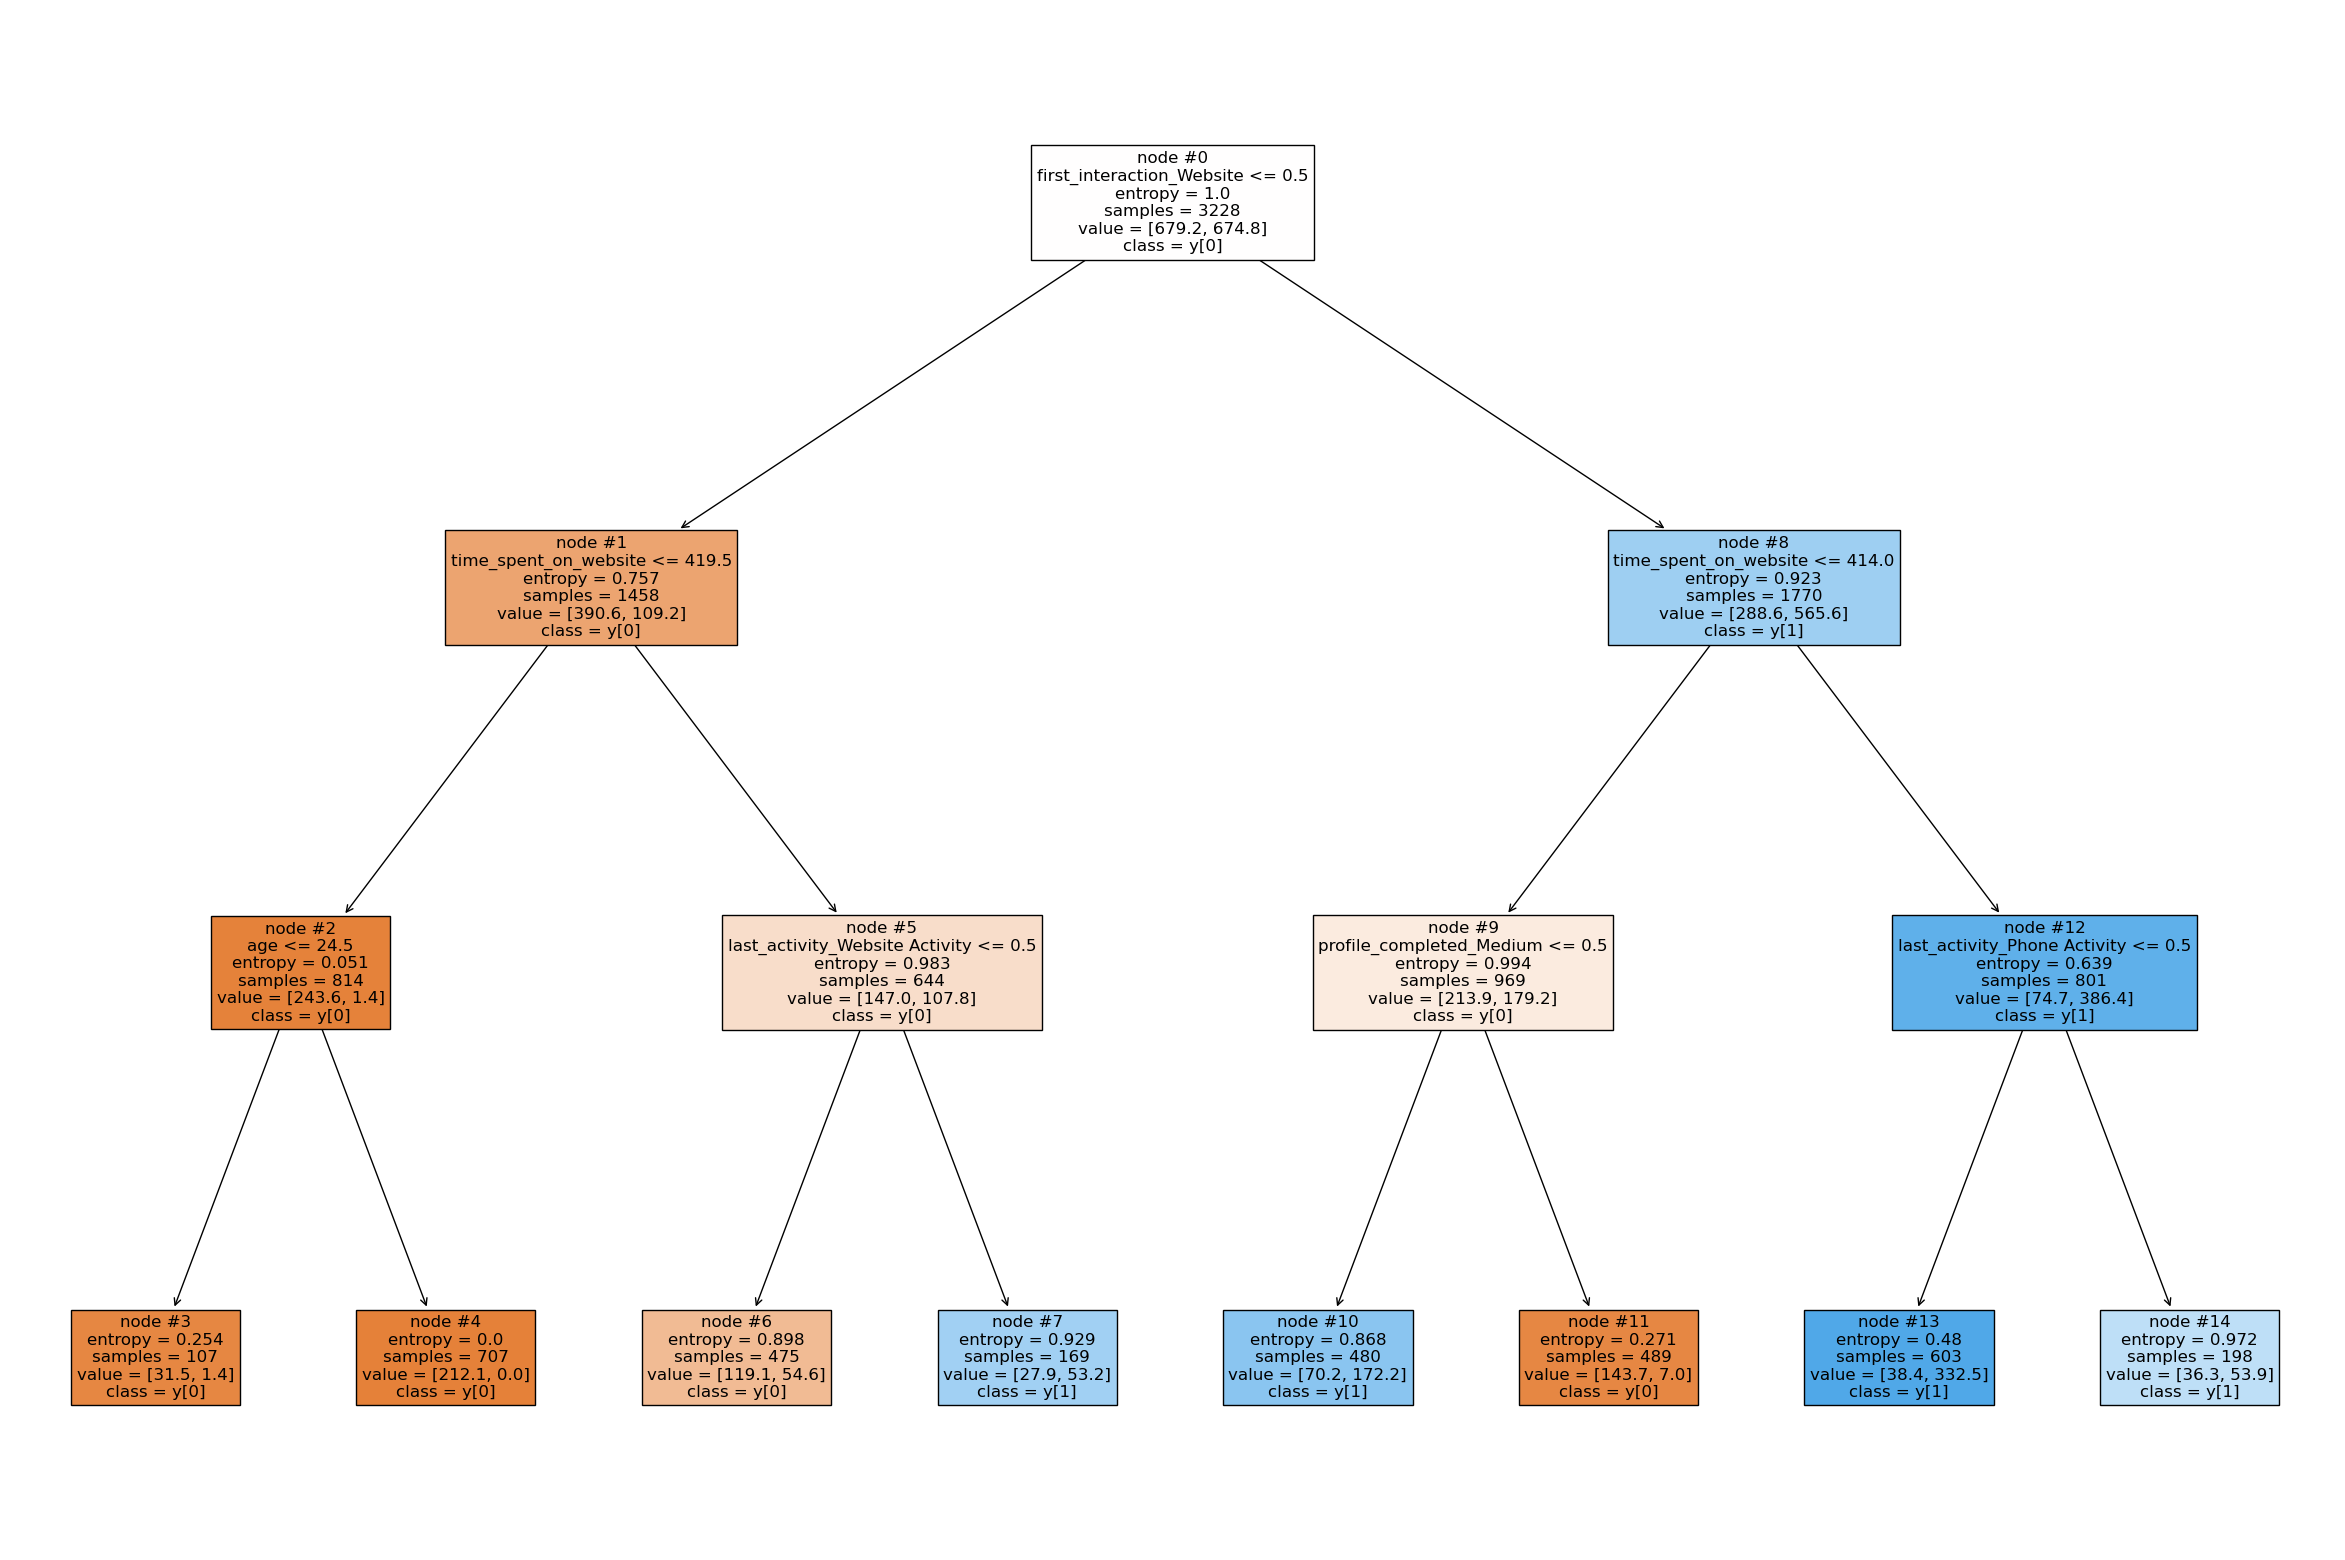

In [48]:
# visualizing the decision tree

features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt_tuned, 
               max_depth = 4, 
               feature_names = features, 
               filled = True, 
               fontsize = 12, 
               node_ids = True, 
               class_names = True)

plt.show()

#### Note:
Blue leaves represent converted leads, i.e., **y[1]** and orange leaves represents leads that did not convert, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

#### Observations:
* The tuned Decision Tree has three levels.
* The **first split in the decision tree is at the first_interaction feature**, which implies that it is clearly the most important factor in deciding if leads will convert or not.
* The **second split is at time_spent_on_website** which we have also observed to have a large impact on lead conversion.
* The **final split is on age, last_activity and profile_completed**. 

### Feature importance

Let's look at the feature importance to further understand the tuned model.

<Axes: xlabel='Importance'>

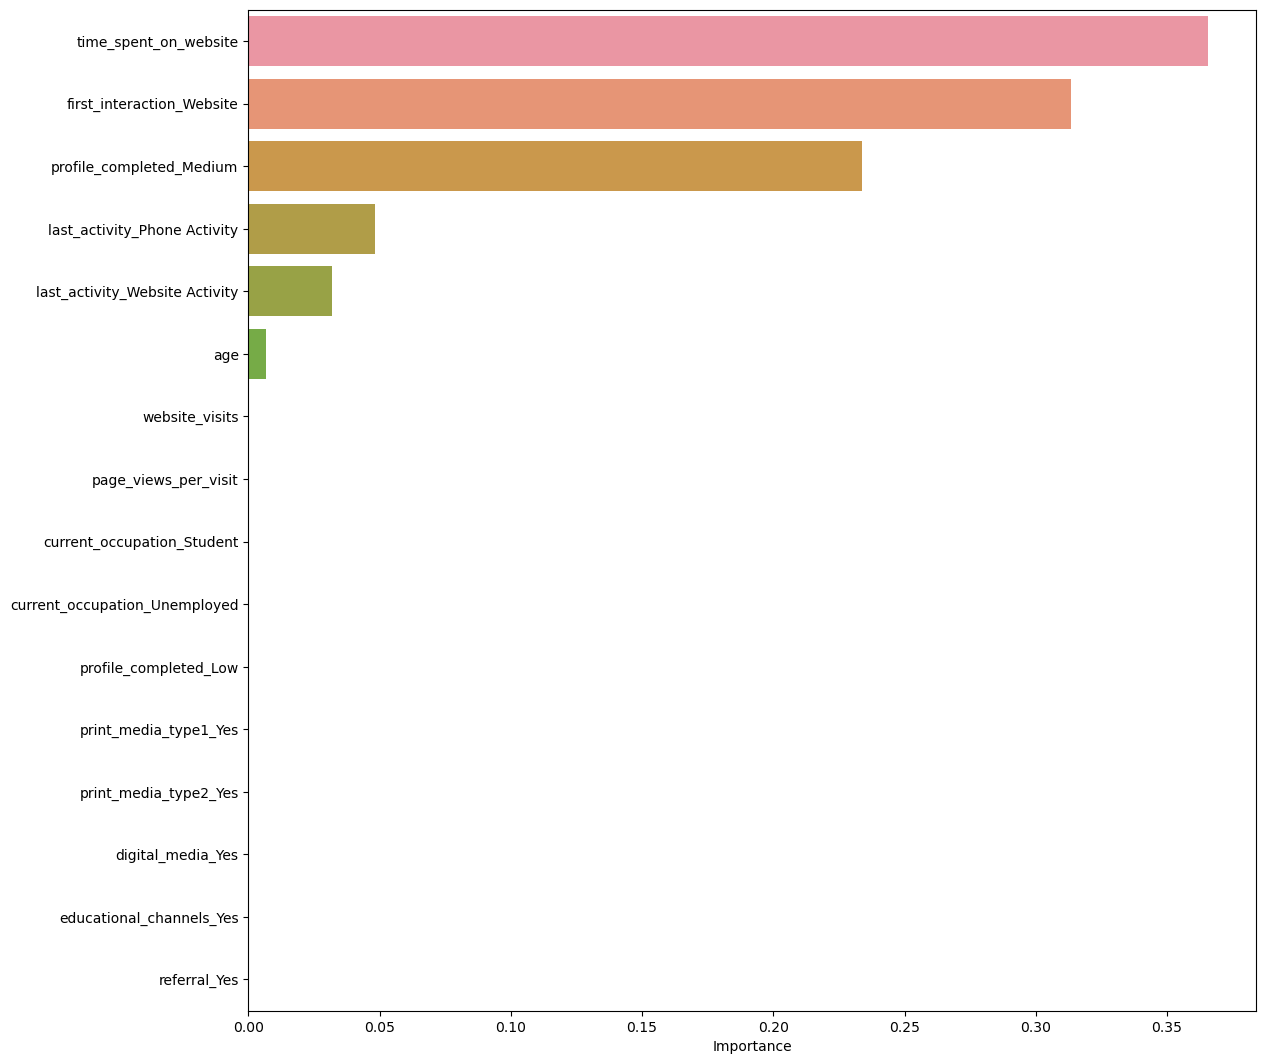

In [49]:
# plotting the feature importance

importances = dt_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, 
                             index = columns, 
                             columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df.Importance, y = importance_df.index)

#### Observations:
* While the root node of the tuned decision tree splits it on first_interaction, **time_spent_on_website** is the most important feature followed closely by **first_interaction**.
* **profile_completed, last_activity and age** are the next important features.
* **The rest of the variables have no impact on this model** for predicting whether a lead will be successfully converted or not.

## Random Forest

### Building a Random Forest model

We will build a random forest model by using the random forest classifier with a class_weight hyperparameter set at {0: 0.3, 1: 0.7}.

In [50]:
# building the random forest model
rf = RandomForestClassifier(random_state = 1, class_weight = {0: 0.3, 1: 0.7})

# fitting the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

#### Checking the model performance on training dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



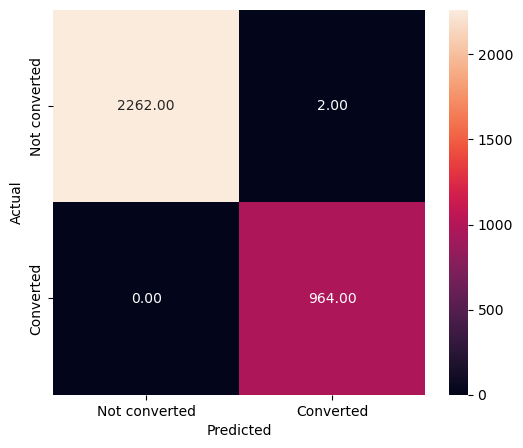

In [51]:
rf_pred_train = rf.predict(X_train)
metric_score(y_train, rf_pred_train)

#### Observations:
* This random forest model is giving a **100% score for all metrics on the training dataset**.
* Interestingly, just as in the base model of the Decision Tree, 2 leads have been misclassified as converted when they are not.

#### Checking the model performance on test dataset 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       971
           1       0.81      0.72      0.76       413

    accuracy                           0.87      1384
   macro avg       0.85      0.82      0.83      1384
weighted avg       0.86      0.87      0.86      1384



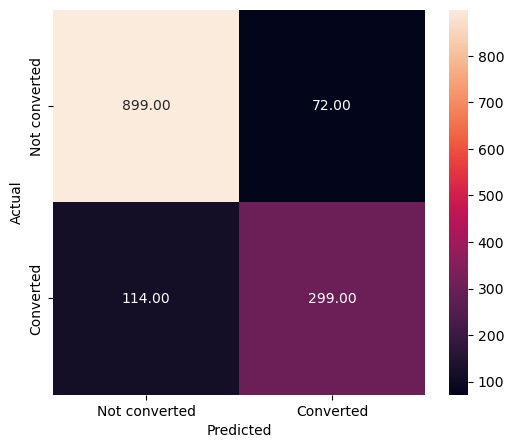

In [52]:
rf_pred_test = rf.predict(X_test)
metric_score(y_test, rf_pred_test)

#### Observations:
* The Random Forest classifier seems to be **overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only 0.72 for class 1.
* Precision has also fallen to 0.81 for the test data.

### Random Forest - Hyperparameter tuning

Let's tune some of the important hyperparameters of the Random Forest Classifier to check if we can get a better model.

We already know from hyperparameter tuning for decision trees that **entropy is a better splitting criterion** for this data, so we will continue to use the same criterion for random forest as well. Additionally, we will keep **the class_weight hyperparameter {0: 0.3, 1: 0.7}** to compensate for the class imbalance.

In [53]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier (random_state = 1, criterion = 'entropy', class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
rf_parameters = {  
        'n_estimators': [100, 250, 500],
        'max_features': [0.7, 0.9, 'auto'],
        'max_depth': [6, 7],
        'min_samples_leaf': [15, 20, 25],
        'max_samples': [0.9, 1]
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Running the grid search
grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = scorer, cv = 5, n_jobs = -1)

# Fitting the grid search on the training data
grid_obj = grid_obj.fit(X_train, y_train)

# Setting the classifier to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fitting the best estimator on the training data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=6, max_features=0.7, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=250, random_state=1)

#### Checking the tuned model performance on training dataset

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2264
           1       0.67      0.89      0.76       964

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



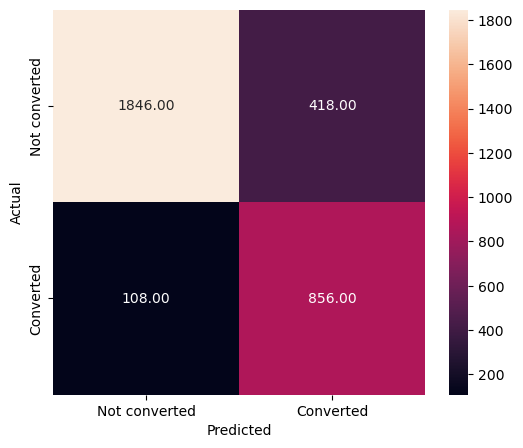

In [54]:
y_rf_tuned_train = rf_tuned.predict(X_train)
metric_score(y_train, y_rf_tuned_train)

#### Observations:
In comparison to the previous model, the performance on the training set has fallen. While the recall is still quite good at 89%, the precision is down to 67%. This makes sense because we are trying to reduce overfitting.

#### Checking the tuned model performance on test dataset

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       971
           1       0.65      0.85      0.74       413

    accuracy                           0.82      1384
   macro avg       0.79      0.83      0.80      1384
weighted avg       0.84      0.82      0.82      1384



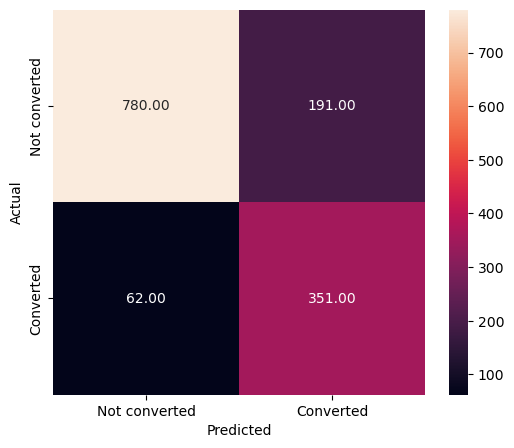

In [55]:
y_rf_tuned_test = rf_tuned.predict(X_test)
metric_score(y_test, y_rf_tuned_test)

#### Observations:
* The performance of the tuned model is better than the previous random forest.
* The tuned model is not overfitting the data and gives approximately the same performance on test and training datasets.
* Precision has decreased from 0.81 to 0.65 but **recall has improved from 0.72 to 0.85**.
* Thus, the tuned model will give fewer false negatives.

### Feature importance
Random forests models cannot be visualized and are thus harder to interpret. We will look at the feature importance to further understand the tuned model.

<Axes: xlabel='Importance'>

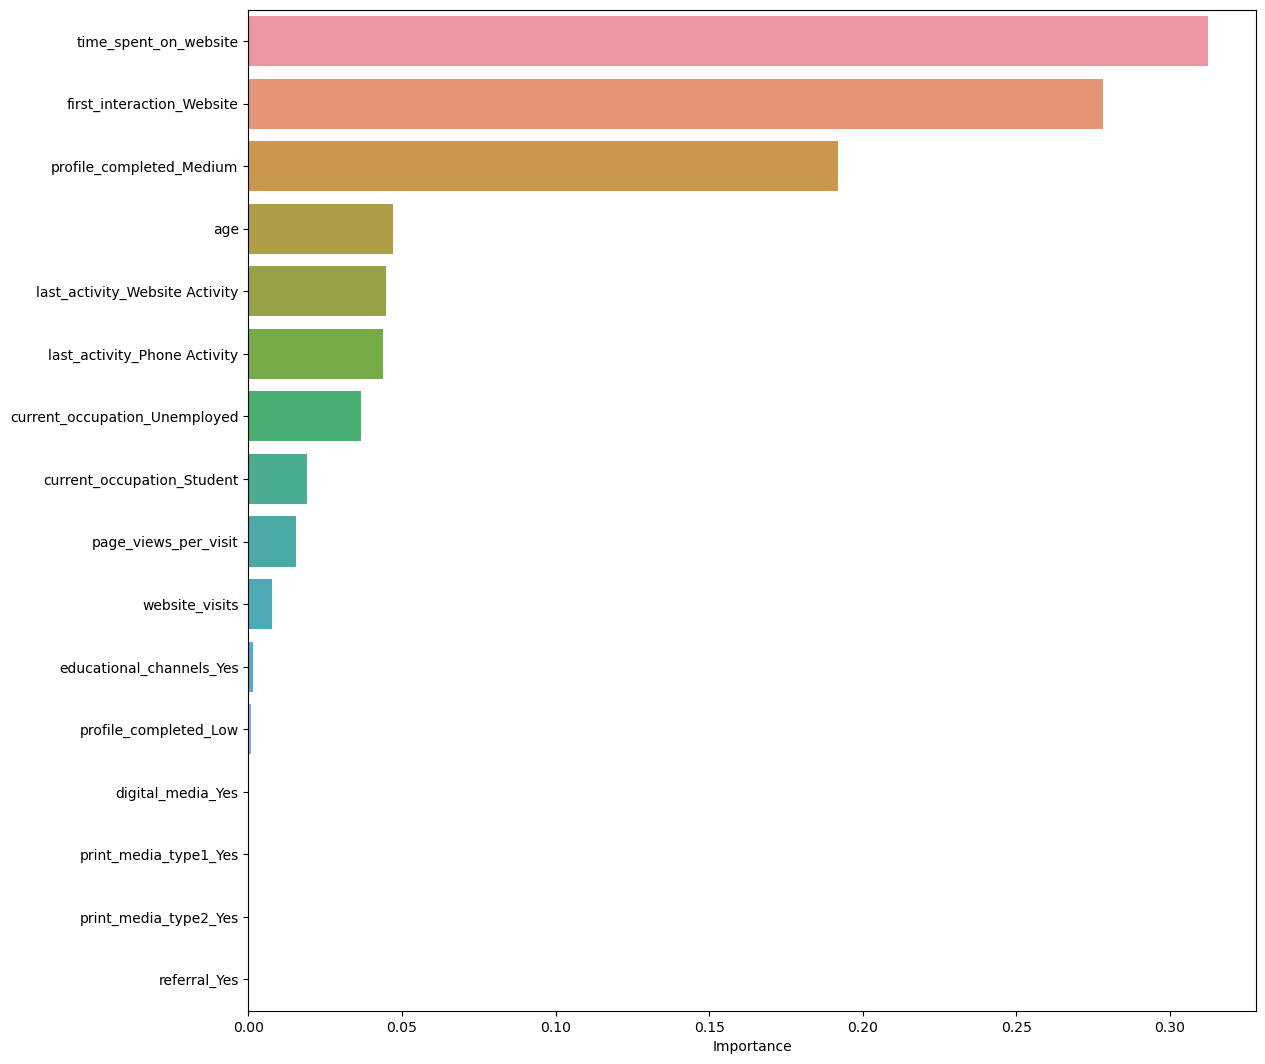

In [56]:
# plotting the feature importance

importances = rf_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, 
                             index = columns, 
                             columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df.Importance, y = importance_df.index)

#### Observations:
* **time_spent_on_website is the most important feature followed closely by first_interaction**.
* **profile_completed, age and last_activity** are the next important features.
* The tuned random forest model also gives some importance to the current_occupation, page_views_per_visit, website_visits, etc. Thus the random forest gives importance to more factors than the decision tree.

## Actionable Insights and Recommendations

### Insights:
* We have used both Decision Tree and Random Forest Classifiers and **have identified the key factors involved in lead conversion** at ExtraaLearn. Two models worked exceptionally well:
    - **The tuned Decision Tree model** has the **best recall at 89%** among the models tested.
    - **The tuned Random Forest model** has a slightly **lower recall at at 85%** however the F1 Score, Accuracy and Precion values are much better for this model. It may be possible to further tune this model. **ExtraaLearn can use this model** to predict whether a lead will convert into a paid customer or not.
* **Time spent on the website** and **first interaction** are the most important features identified by both models while the tuned Random Forest model takes into consideration a larger number of factors when making predictions. 

### Recommendations:

We observed that **success of lead conversion in the data provided was only ~30%**. The following are some recommendations to improve this rate:  
* We observed that **time spent on the website** is an important factor for lead conversion. 
    * The company should focus on prioritizing these leads as they may be more more interested in the programs are offered and thus spend more time on the website.
* **First interaction** is the second most important factor to consider for lead conversion. 
    * We have observed that **website interactions are more likely to succeed in coverting a lead than the mobile app**. 
    * The company should focus on increasing the website exposure and guiding new leads to interact with the website first. Additionally, the company should explore why the mobile app is less successful in converting leads and perhaps improve the interface or scrap it entirely.
* Leads that **complete their profiles are more likely to convert to paid customers**. 
    * ExtraaLearn should prioritize the completion of medium level profiles by sending reminders/contacting leads about benefits/information that can be unlocked by completing the profile. 
* **Age and occupation** play an important role in lead conversion. 
    * More than 75% of the converted leads are older than 41 years. The company can prioritize these leads by marketing and adding more content that would be of interest to this age group.
    * Majority of this age group are working professionals and unemployed individuals that are looking to upskill/reskill and ExtraaLearn can provide them with personalized recommendations on programs that would benefit them.
    * Younger leads are less likely to convert. These are mostly students or young professionals who may not be looking to upskill. The company can consider offering introductory courses exploring cutting-edge technologies and other content that might build interest for ExtraaLearn in this group.